In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
df = X.join(y)

df['target'].replace(dict(enumerate(iris['target_names'])), 
                     inplace=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [4]:
mean = np.mean(x_std)
x_std = x_std - mean

cov = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov)

eig_vecs = eig_vecs.T
idxs = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idxs]
eig_vecs = eig_vecs[idxs]

components = eig_vecs[0:2]
print('Components:', components)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]
Eigenvectors 
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [5]:
print("v1:", eig_vals[0] / sum(eig_vals))
print("v2:", eig_vals[1] / sum(eig_vals))
print("v3:", eig_vals[2] / sum(eig_vals))
print("v4:", eig_vals[3] / sum(eig_vals))

v1: 0.7296244541329987
v2: 0.22850761786701784
v3: 0.03668921889282873
v4: 0.005178709107154816


In [5]:
projected_X = np.dot(x_std, components.T)
projected_X

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [7]:
print('Shape of X:', x_std.shape)
print('Shape of transformed X:', projected_X.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [8]:
result = pd.DataFrame(projected_X
             , columns = ['PC1', 'PC2'])
result['target'] = df['target']
result.head()

,PC1,PC2,target
0,-2.264703,-0.480027,setosa
1,-2.080961,0.674134,setosa
2,-2.364229,0.341908,setosa
3,-2.299384,0.597395,setosa
4,-2.389842,-0.646835,setosa


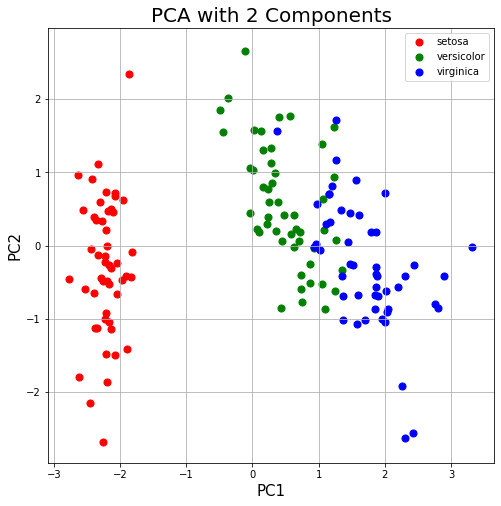

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA with 2 Components', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = result['target'] == target
    ax.scatter(result.loc[indices, 'PC1']
               , result.loc[indices, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()